In [2]:
import  pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

In [3]:
df=pd.read_csv('Combine_data.csv')

In [4]:
df=df.dropna()

In [5]:
X=df.drop('PM 2.5',axis=1)
y=df['PM 2.5']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
from sklearn.model_selection import cross_val_score
score=cross_val_score(model ,X ,y,scoring='neg_mean_squared_error' ,cv=5)
score.mean()



-3499.356187290208

# Ridge Regression 

In [73]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [74]:
ridge=Ridge()
param_grid={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,20,30,40,50,100]}
grid_search=GridSearchCV(ridge,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5)

In [75]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20,
                                   30, 40, 50, 100]},
             scoring='neg_mean_squared_error')

In [76]:
grid_search.best_params_

{'alpha': 1}

In [77]:
grid_search.best_score_

-2935.268474010967

In [78]:
ridge=Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [79]:
prediction=ridge.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error
print('MSE {}'.format(mean_squared_error(y_test,prediction)))

MSE 2954.6157694238505


In [80]:
from sklearn.linear_model import Lasso
lasso=Lasso()
param_grid={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,20,30,40,50,100]}
grid_lasso=GridSearchCV(lasso,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5)

In [81]:
grid_lasso.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20,
                                   30, 40, 50, 100]},
             scoring='neg_mean_squared_error')

In [82]:
grid_lasso.best_score_

-2922.5068496970807

In [83]:
grid_lasso.best_params_

{'alpha': 1}

In [95]:
lasso=Lasso(alpha=1.0)
lasso.fit(X_train,y_train)

Lasso()

In [96]:
predictions=lasso.predict(X_test)

In [97]:
print('MSE {}'.format(mean_squared_error(y_test,predictions)))

MSE 2915.118271632254


C:\Users\chirag.bhargava\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

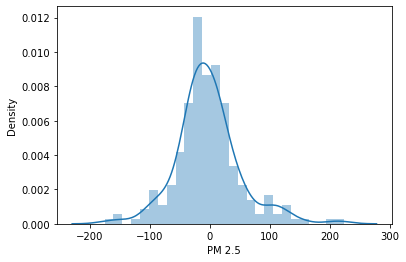

In [98]:
sns.distplot(y_test-predictions)

<AxesSubplot:xlabel='PM 2.5'>

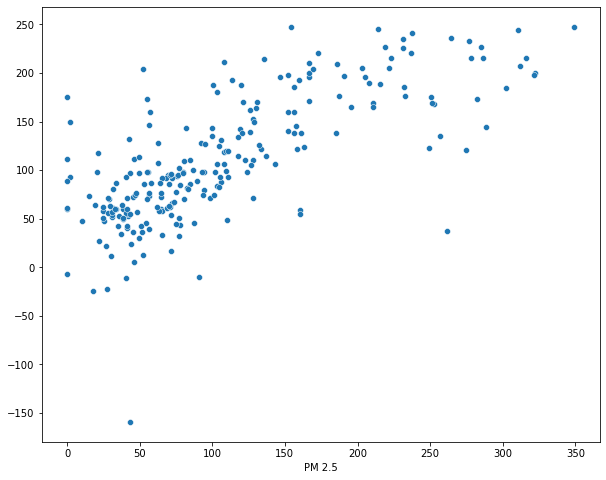

In [100]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test,y=predictions)

In [101]:
import pickle
file=open('lasso_regression_model.pkl', 'wb')

pickle.dump(lasso,file)